Домашняя работа по машинному обучению №1
======

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re
import pandas as pd
%matplotlib inline

Загрузка данных
К списку значений, распознаваемых как NaN добавлен знак вопроса (по умолчанию не распознавался)

In [2]:
data = pd.read_csv('dermatology.data', sep = ',', engine = 'python', header=None, na_values=['?'])

Формирование шапки из файла 'dermatology.names'

In [ ]:
names = ['' for i in range(0, data.shape[1])]
namesDescription = open('dermatology.names')

for s in namesDescription:
    result = re.search('(\d{1,2}): ([a-zA-Z -]*)', s)
    if (result != None):
        names[int(result.group(1)) - 1] = result.group(2)
namesDescription.close()
names[-2] = 'age' #для красоты
names[-1] = 'class' #в файле не написано, что последний столбец является описанием заболеваний, но эксперименты показали, что это так
data.columns = names

Отключение пропуска строк для удобства.

In [3]:
pd.options.display.max_columns = None

In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,family history,melanin incontinence,eosinophils in the infiltrate,PNL infiltrate,fibrosis of the papillary dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing of the rete ridges,elongation of the rete ridges,thinning of the suprapapillary epidermis,spongiform pustule,munro microabcess,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45.0,3
5,2,3,2,0,0,0,0,0,0,0,0,0,2,1,0,2,2,0,2,0,0,0,1,0,0,0,0,2,0,0,0,1,0,41.0,2
6,2,1,0,2,0,0,0,0,0,0,0,0,0,0,3,1,3,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,18.0,5
7,2,2,3,3,3,3,0,2,0,0,0,2,0,0,0,2,3,0,0,0,0,0,0,0,0,2,2,3,2,0,0,3,3,57.0,3
8,2,2,1,0,2,0,0,0,0,0,0,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,0,2,0,0,0,2,0,22.0,4
9,2,2,1,0,1,0,0,0,0,0,0,0,0,0,0,3,2,0,2,0,0,0,0,0,0,0,0,2,0,0,0,2,0,30.0,4


In [6]:
print(data)

     erythema  scaling  definite borders  itching  koebner phenomenon  \
0           2        2                 0        3                   0   
1           3        3                 3        2                   1   
2           2        1                 2        3                   1   
3           2        2                 2        0                   0   
4           2        3                 2        2                   2   
5           2        3                 2        0                   0   
6           2        1                 0        2                   0   
7           2        2                 3        3                   3   
8           2        2                 1        0                   2   
9           2        2                 1        0                   1   
10          3        3                 2        1                   1   
11          2        2                 0        3                   0   
12          3        3                 1        2  

In [7]:
data.head()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,family history,melanin incontinence,eosinophils in the infiltrate,PNL infiltrate,fibrosis of the papillary dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing of the rete ridges,elongation of the rete ridges,thinning of the suprapapillary epidermis,spongiform pustule,munro microabcess,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45.0,3


In [8]:
data.tail()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,family history,melanin incontinence,eosinophils in the infiltrate,PNL infiltrate,fibrosis of the papillary dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing of the rete ridges,elongation of the rete ridges,thinning of the suprapapillary epidermis,spongiform pustule,munro microabcess,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,age,class
361,2,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,25.0,4
362,3,2,1,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2,0,36.0,4
363,3,2,2,2,3,2,0,2,0,0,0,2,2,0,0,3,3,0,0,0,0,0,0,0,3,0,3,0,3,0,0,2,3,28.0,3
364,2,1,3,1,2,3,0,2,0,0,0,2,0,0,0,3,2,0,0,0,0,0,0,0,3,0,2,0,1,0,0,2,3,50.0,3
365,3,2,2,0,0,0,0,0,3,3,0,0,0,1,0,0,2,0,2,3,2,3,0,2,0,2,0,0,0,0,0,3,0,35.0,1


In [9]:
print(data.shape)
print(data.columns)

(366, 35)
Index(['erythema', 'scaling', 'definite borders', 'itching',
       'koebner phenomenon', 'polygonal papules', 'follicular papules',
       'oral mucosal involvement', 'knee and elbow involvement',
       'scalp involvement', 'family history', 'melanin incontinence',
       'eosinophils in the infiltrate', 'PNL infiltrate',
       'fibrosis of the papillary dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing of the rete ridges',
       'elongation of the rete ridges',
       'thinning of the suprapapillary epidermis', 'spongiform pustule',
       'munro microabcess', 'focal hypergranulosis',
       'disappearance of the granular layer',
       'vacuolisation and damage of basal layer', 'spongiosis',
       'saw-tooth appearance of retes', 'follicular horn plug',
       'perifollicular parakeratosis', 'inflammatory monoluclear inflitrate',
       'band-like infiltrate', 'age', 'class'],
      dtype='object')


In [10]:
data.index

RangeIndex(start=0, stop=366, step=1)

In [11]:
data.at[2, 'age']

26.0

In [12]:
data['age']

0      55.0
1       8.0
2      26.0
3      40.0
4      45.0
5      41.0
6      18.0
7      57.0
8      22.0
9      30.0
10     20.0
11     21.0
12     22.0
13     10.0
14     65.0
15     40.0
16     30.0
17     38.0
18     23.0
19     17.0
20      8.0
21     51.0
22     42.0
23     44.0
24     22.0
25     33.0
26     10.0
27     17.0
28     43.0
29     50.0
       ... 
336    60.0
337    42.0
338    32.0
339    51.0
340    33.0
341    68.0
342    50.0
343     9.0
344    16.0
345    35.0
346    40.0
347    22.0
348    10.0
349     7.0
350    25.0
351     9.0
352    55.0
353    45.0
354    56.0
355    36.0
356    75.0
357    45.0
358    24.0
359    40.0
360    25.0
361    25.0
362    36.0
363    28.0
364    50.0
365    35.0
Name: age, Length: 366, dtype: float64

In [13]:
data['age'][3]

40.0

In [14]:
data['erythema'].dtype.name

'int64'

In [15]:
type(data['age'][3])

numpy.float64

In [16]:
type(data['age'])

pandas.core.series.Series

In [17]:
data[['age', 'class']]

,age,class
0,55.0,2
1,8.0,1
2,26.0,3
3,40.0,1
4,45.0,3
5,41.0,2
6,18.0,5
7,57.0,3
8,22.0,4
9,30.0,4


In [18]:
data.describe()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,family history,melanin incontinence,eosinophils in the infiltrate,PNL infiltrate,fibrosis of the papillary dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing of the rete ridges,elongation of the rete ridges,thinning of the suprapapillary epidermis,spongiform pustule,munro microabcess,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,age,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,358.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,0.125683,0.404372,0.139344,0.546448,0.336066,1.368852,1.956284,0.527322,1.289617,0.663934,0.991803,0.633880,0.295082,0.363388,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,36.296089,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,0.331946,0.869818,0.411790,0.815451,0.853139,1.104418,0.712512,0.757116,0.917562,1.056829,1.162161,1.034924,0.670578,0.759721,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,15.324557,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,49.750000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000,6.000000


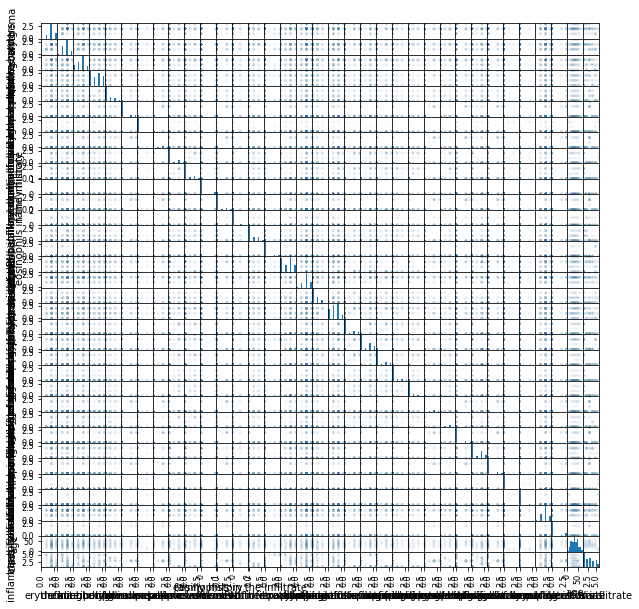

In [19]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

In [20]:
data.corr()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,family history,melanin incontinence,eosinophils in the infiltrate,PNL infiltrate,fibrosis of the papillary dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing of the rete ridges,elongation of the rete ridges,thinning of the suprapapillary epidermis,spongiform pustule,munro microabcess,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,age,class
erythema,1.000000,0.435467,0.260087,-0.047623,0.000694,0.033571,-0.109550,-0.026810,0.141008,0.186684,0.172059,0.042126,0.075228,0.224095,-0.354595,0.021565,0.064165,-0.055432,0.210030,0.157558,0.007819,0.167868,0.169773,0.113464,-0.013761,0.159100,0.002559,0.022468,-0.005779,-0.005450,0.009539,0.075758,-0.006955,-0.005028,-0.335537
scaling,0.435467,1.000000,0.357987,-0.084197,-0.010576,-0.075035,-0.092400,-0.082969,0.298398,0.301577,0.181491,-0.074856,0.042211,0.282486,-0.383585,-0.110809,0.108095,0.013149,0.296752,0.320740,0.139073,0.330343,0.297783,0.186366,-0.085021,0.211484,-0.109523,0.012151,-0.114467,-0.010518,-0.011135,-0.010977,-0.132079,0.016006,-0.468688
definite borders,0.260087,0.357987,1.000000,-0.062564,0.241342,0.327754,-0.166662,0.286684,0.302309,0.268862,0.115844,0.311398,-0.132021,0.041330,-0.274414,-0.205391,0.189761,0.043894,0.361213,0.387205,0.201702,0.369266,0.246204,0.242232,0.291147,0.354768,0.298095,-0.255536,0.274576,-0.086250,-0.123947,0.111882,0.282578,0.138493,-0.391974
itching,-0.047623,-0.084197,-0.062564,1.000000,0.267878,0.409696,-0.144825,0.359163,-0.299645,-0.155639,-0.136615,0.359207,0.095434,-0.145288,0.203032,0.214822,0.067080,-0.008460,-0.075568,-0.232224,-0.124058,-0.244052,-0.152689,-0.056056,0.363488,-0.192684,0.367650,0.017514,0.376186,-0.175866,-0.184074,0.062781,0.386691,0.048053,0.054772
koebner phenomenon,0.000694,-0.010576,0.241342,0.267878,1.000000,0.394108,-0.172741,0.392554,-0.066372,0.015202,-0.083247,0.385687,-0.046366,-0.169377,-0.247451,0.145960,-0.054449,0.002635,-0.036801,0.008471,-0.163819,0.026064,-0.002065,0.157646,0.400409,0.004327,0.376473,-0.005938,0.381687,-0.147955,-0.164364,0.083358,0.382844,0.081162,-0.091323
polygonal papules,0.033571,-0.075035,0.327754,0.409696,0.394108,1.000000,-0.137093,0.865142,-0.276058,-0.253234,-0.151841,0.907044,0.028824,-0.314515,-0.158046,0.379643,0.129210,-0.164355,-0.042098,-0.294857,-0.400544,-0.287468,-0.206530,-0.201893,0.880972,-0.119698,0.911626,0.080063,0.895107,-0.095477,-0.110204,0.228426,0.905822,0.096953,0.057785
follicular papules,-0.109550,-0.092400,-0.166662,-0.144825,-0.172741,-0.137093,1.000000,-0.132394,0.222255,-0.003535,0.192866,-0.136165,-0.087452,-0.119728,0.019698,-0.010869,-0.096592,0.189201,-0.029654,-0.115856,-0.105356,-0.128361,-0.057283,-0.095856,-0.118710,-0.157296,-0.139960,-0.013454,-0.139141,0.785282,0.844929,-0.084864,-0.133871,-0.371368,0.477813
oral mucosal involvement,-0.026810,-0.082969,0.286684,0.359163,0.392554,0.865142,-0.132394,1.000000,-0.283466,-0.259813,-0.151825,0.869231,0.014122,-0.303735,-0.140047,0.360138,0.101565,-0.155177,-0.039258,-0.284750,-0.386815,-0.277615,-0.199452,-0.190861,0.884351,-0.106704,0.887552,0.120344,0.875209,-0.082601,-0.106426,0.250937,0.892341,0.111047,0.055805
knee and elbow involvement,0.141008,0.298398,0.302309,-0.299645,-0.066372,-0.276058,0.222255,-0.283466,1.000000,0.659206,0.341915,-0.272314,-0.198670,0.331709,-0.227428,-0.529946,0.116711,0.229538,0.439951,0.721602,0.496067,0.644669,0.447252,0.518155,-0.267508,0.481743,-0.282151,-0.413200,-0.280395,0.232903,0.257661,-0.068621,-0.276711,-0.078267,-0.383305
scalp involvement,0.186684,0.301577,0.268862,-0.155639,0.015202,-0.253234,-0.003535,-0.259813,0.659206,1.000000,0.292728,-0.256779,-0.076957,0

График зависимисти определённой болезни от возраста. Можно заметить, что болезнь под кодом 6 более присуща людям до 20 лет.

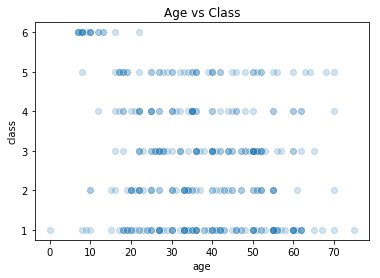

In [21]:
plt.plot(data['age'], data['class'], 'o', alpha = 0.2)
plt.xlabel('age')
plt.ylabel('class')
plt.title('Age vs Class')
pass

In [22]:
data['family history'] == 1

0      False
1       True
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10      True
11     False
12     False
13      True
14     False
15     False
16     False
17      True
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
336    False
337    False
338    False
339    False
340    False
341    False
342    False
343     True
344    False
345    False
346    False
347    False
348     True
349    False
350    False
351     True
352    False
353    False
354    False
355    False
356     True
357    False
358    False
359    False
360    False
361    False
362    False
363    False
364    False
365    False
Name: family history, Length: 366, dtype: bool

График зависимости болезней от возраста и наличия этой болезни у родственников. Можно заметить, что болезням под кодами 1 и 6 присуща наследственность или предрасположенность.

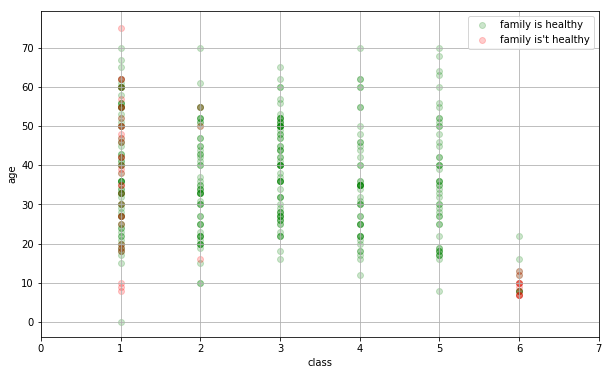

In [23]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['family history'] == 0]['class'],
            data[data['family history'] == 0]['age'],
            alpha = 0.2,
            label = 'family is healthy',
            color = 'g')

plt.scatter(data[data['family history'] == 1]['class'],
            data[data['family history'] == 1]['age'],
            alpha = 0.2,
            label = 'family is\'t healthy',
            color = 'r')

plt.xlabel('class')
plt.xticks(range(18))
plt.xlim(0, 7)
plt.ylabel('age')
plt.legend()
plt.grid()
pass

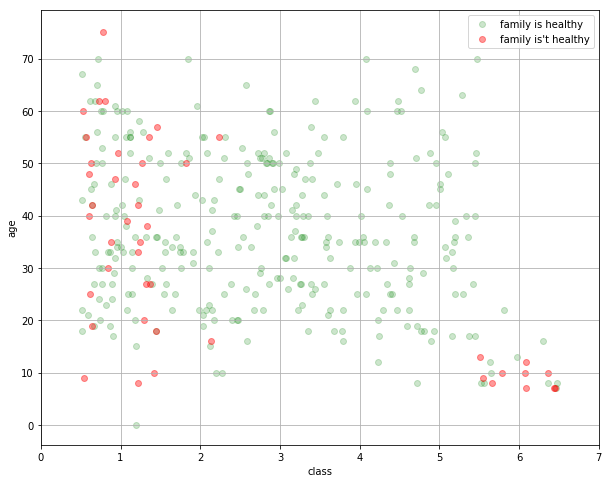

In [24]:
np.random.seed(0)
class_rnd = data['class'] + np.random.rand(data.shape[0]) - .5

plt.figure(figsize = (10, 8))

plt.scatter(class_rnd[data['family history'] == 0],
            data[data['family history'] == 0]['age'],
            alpha = 0.2,
            label = 'family is healthy',
            color = 'g')

plt.scatter(class_rnd[data['family history'] == 1],
            data[data['family history'] == 1]['age'],
            alpha = 0.4,
            label = 'family is\'t healthy',
            color = 'r')

plt.xlabel('class')
plt.xticks(range(18))
plt.xlim(0, 7)
plt.ylabel('age')
plt.legend()
plt.grid()
pass

In [25]:
data.describe(include='all')

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,family history,melanin incontinence,eosinophils in the infiltrate,PNL infiltrate,fibrosis of the papillary dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing of the rete ridges,elongation of the rete ridges,thinning of the suprapapillary epidermis,spongiform pustule,munro microabcess,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,age,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,358.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,0.125683,0.404372,0.139344,0.546448,0.336066,1.368852,1.956284,0.527322,1.289617,0.663934,0.991803,0.633880,0.295082,0.363388,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,36.296089,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,0.331946,0.869818,0.411790,0.815451,0.853139,1.104418,0.712512,0.757116,0.917562,1.056829,1.162161,1.034924,0.670578,0.759721,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,15.324557,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,49.750000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000,6.000000


Исследование типа и диапазона значений полей (для подтверждения информации из файла 'dermatology.name').

In [26]:
for column in data.columns:
    print(column, data[column].unique())

erythema [2 3 1 0]
scaling [2 3 1 0]
definite borders [0 3 2 1]
itching [3 2 0 1]
koebner phenomenon [0 1 2 3]
polygonal papules [0 3 2 1]
follicular papules [0 3 1 2]
oral mucosal involvement [0 3 2 1]
knee and elbow involvement [1 0 3 2]
scalp involvement [0 1 2 3]
family history [0 1]
melanin incontinence [0 1 2 3]
eosinophils in the infiltrate [0 2 1]
PNL infiltrate [0 1 3 2]
fibrosis of the papillary dermis [0 3 1 2]
exocytosis [3 1 0 2]
acanthosis [2 3 1 0]
hyperkeratosis [0 2 1 3]
parakeratosis [0 2 3 1]
clubbing of the rete ridges [0 2 1 3]
elongation of the rete ridges [0 2 3 1]
thinning of the suprapapillary epidermis [0 2 3 1]
spongiform pustule [0 2 1 3]
munro microabcess [0 1 2 3]
focal hypergranulosis [0 2 3 1]
disappearance of the granular layer [0 3 2 1]
vacuolisation and damage of basal layer [0 2 3 1]
spongiosis [3 0 2 1]
saw-tooth appearance of retes [0 2 3 1]
follicular horn plug [0 1 2 3]
perifollicular parakeratosis [0 2 1 3]
inflammatory monoluclear inflitrate [1

Подготовка данных
==

Из файла 'dermatology.name' известно что 34 медицинских показателея представленны в данных своей степенью выраженности - от полного отсутвия (0) до полного проявления (3). Это же показывает анализ уникальных значений. 'family history' логический бинарный. 'class' кодирует определённую болезнь (категориальный признак).

In [27]:
categorical_columns = ['class', 'family history']
numerical_columns = [c for c in data.columns if c not in categorical_columns]
print(categorical_columns)
print(numerical_columns)

['class', 'family history']
['erythema', 'scaling', 'definite borders', 'itching', 'koebner phenomenon', 'polygonal papules', 'follicular papules', 'oral mucosal involvement', 'knee and elbow involvement', 'scalp involvement', 'melanin incontinence', 'eosinophils in the infiltrate', 'PNL infiltrate', 'fibrosis of the papillary dermis', 'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis', 'clubbing of the rete ridges', 'elongation of the rete ridges', 'thinning of the suprapapillary epidermis', 'spongiform pustule', 'munro microabcess', 'focal hypergranulosis', 'disappearance of the granular layer', 'vacuolisation and damage of basal layer', 'spongiosis', 'saw-tooth appearance of retes', 'follicular horn plug', 'perifollicular parakeratosis', 'inflammatory monoluclear inflitrate', 'band-like infiltrate', 'age']


In [28]:
data.median(axis = 0)

erythema                                     2.0
scaling                                      2.0
definite borders                             2.0
itching                                      1.0
koebner phenomenon                           0.0
polygonal papules                            0.0
follicular papules                           0.0
oral mucosal involvement                     0.0
knee and elbow involvement                   0.0
scalp involvement                            0.0
family history                               0.0
melanin incontinence                         0.0
eosinophils in the infiltrate                0.0
PNL infiltrate                               0.0
fibrosis of the papillary dermis             0.0
exocytosis                                   2.0
acanthosis                                   2.0
hyperkeratosis                               0.0
parakeratosis                                1.0
clubbing of the rete ridges                  0.0
elongation of the re

Обработка пропущенных значений
--

Заполнение отсутсвующих данных медианным значением (есть только в 'age').

In [29]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [30]:
data[numerical_columns].count(axis = 0)

erythema                                    366
scaling                                     366
definite borders                            366
itching                                     366
koebner phenomenon                          366
polygonal papules                           366
follicular papules                          366
oral mucosal involvement                    366
knee and elbow involvement                  366
scalp involvement                           366
melanin incontinence                        366
eosinophils in the infiltrate               366
PNL infiltrate                              366
fibrosis of the papillary dermis            366
exocytosis                                  366
acanthosis                                  366
hyperkeratosis                              366
parakeratosis                               366
clubbing of the rete ridges                 366
elongation of the rete ridges               366
thinning of the suprapapillary epidermis

In [31]:
data[categorical_columns].count(axis = 0)

class             366
family history    366
dtype: int64

Векторизация
--

In [32]:
binary_columns = [c for c in categorical_columns if data[c].unique().size == 2]
nonbinary_columns = [c for c in categorical_columns if data[c].unique().size > 2]
print(binary_columns, nonbinary_columns)

['family history'] ['class']


'family histoty' уже бинарный логический.

In [33]:
data['family history'].describe()

count    366.000000
mean       0.125683
std        0.331946
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: family history, dtype: float64

Векторизация поля 'class'. 'get_dummies' работает только со строковыми значениями (по крайней мере по-другому не получалось), поэтому преобразование из чисел в строки.

In [34]:
data['class'] = data['class'].astype(str)
data['class'].unique()

array(['2', '1', '3', '5', '4', '6'], dtype=object)

In [35]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
data_nonbinary.columns

Index(['class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6'], dtype='object')

Нормализация количественных признаков
--

Приведение количеситвенных признаков к нулевому среднему и единичному среднеквадратичному отклонению.

In [36]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,melanin incontinence,eosinophils in the infiltrate,PNL infiltrate,fibrosis of the papillary dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing of the rete ridges,elongation of the rete ridges,thinning of the suprapapillary epidermis,spongiform pustule,munro microabcess,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,age
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,0.404372,0.139344,0.546448,0.336066,1.368852,1.956284,0.527322,1.289617,0.663934,0.991803,0.633880,0.295082,0.363388,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,36.267760
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,0.869818,0.411790,0.815451,0.853139,1.104418,0.712512,0.757116,0.917562,1.056829,1.162161,1.034924,0.670578,0.759721,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,15.156875
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,48.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000


In [37]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,melanin incontinence,eosinophils in the infiltrate,PNL infiltrate,fibrosis of the papillary dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing of the rete ridges,elongation of the rete ridges,thinning of the suprapapillary epidermis,spongiform pustule,munro microabcess,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,age
count,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,366.000000,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02
mean,-2.426717e-16,-1.407496e-16,-5.824121e-17,5.824121e-17,-9.706868e-18,-2.669389e-17,4.004083e-17,4.853434e-17,6.794808e-17,-9.706868e-18,1.213358e-18,-4.853434e-18,-1.164824e-16,-2.426717e-18,-7.401487e-17,1.941374e-17,-3.882747e-17,-1.213358e-16,5.824121e-17,-3.882747e-17,-1.941374e-17,2.426717e-17,-2.912060e-17,4.489426e-17,0.000000,-1.456030e-17,7.037479e-17,-1.820038e-17,7.280151e-18,1.941374e-17,5.824121e-17,7.037479e-17,-2.135511e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.111389e+00,-2.558821e+00,-1.707038e+00,-1.200141e+00,-6.980933e-01,-4.680608e-01,-2.920963e-01,-4.520179e-01,-6.253991e-01,-5.732151e-01,-4.648921e-01,-3.383866e-01,-6.701178e-01,-3.939165e-01,-1.239433e+00,-2.745617e+00,-6.964886e-01,-1.405483e+00,-6.282326e-01,-8.534132e-01,-6.124891e-01,-4.400415e-01,-4.783175e-01,-4.631972e-01,-0.537035,-4.778480e-01,-8.437228e-01,-4.750510e-01,-2.305010e-01,-2.348039e-01,-2.570032e+00,-5.015288e-01,-2.392826e+00
25%,-1.027539e-01,-1.133359e+00,-6.051406e-01,-1.200141e+00,-6.980933e-01,-4.680608e-01,-2.920963e-01,-4.520179e-01,-6.253991e-01,-5.732151e-01,-4.648921e-01,-3.383866e-01,-6.701178e-01,-3.939165e-01,-1.239433e+00,6.135458e-02,-6.964886e-01,-3.156382e-01,-6.282326e-01,-8.534132e-01,-6.124891e-01,-4.400415e-01,-4.783175e-01,-4.631972e-01,-0.537035,-4.778480e-01,-8.437228e-01,-4.750510e-01,-2.305010e-01,-2.348039e-01,-1.192826e+00,-5.015288e-01,-7.434092e-01
50%,-1.027539e-01,2.921028e-01,4.967572e-01,-3.216379e-01,-6.980933e-01,-4.680608e-01,-2.920963e-01,-4.520179e-01,-6.253991e-01,-5.732151e-01,-4.648921e-01,-3.383866e-01,-6.701178e-01,-3.939165e-01,5.714751e-01,6.135458e-02,-6.964886e-01,-3.156382e-01,-6.282326e-01,-8.534132e-01,-6.124891e-01,-4.400415e-01,-4.783175e-01,-4.631972e-01,-0.537035,-4.778480e-01,-8.437228e-01,-4.750510e-01,-2.305010e-01,-2.348039e-01,1.843800e-01,-5.015288e-01,-8.364254e-02
75%,-1.027539e-01,2.921028e-01,4.967572e-01,5.568656e-01,4.032090e-01,-4.680608e-01,-2.920963e-01,-4.520179e-01,3.919168e-01,5.309782e-01,-4.648921e-01,-3.383866e-01,5.561978e-01,-3.939165e-01,5.714751e-01,6.135458e-02,6.243136e-01,7.742069e-01,1.264221e+00,8.675192e-01,3.537652e-01,-4.400415e-01,-4.783175e-01,-4.631972e-01,0.619170,-4.778480e-01,9.259193e-01,-4.750510e-01,-2.305010e-01,-2.348039e-01,1.843800e-01,-5.015288e-01,7.740541e-01
max,1.401564e+00,1.717565e+00,1.598655e+00,1.435369e+00,2.605814e+00,2.665663e+00,4.965637e+00,3.144472e+00,2.426548e+00,2.739365e+00,2.984105e+00,4.518457e+00,3

Объединение в одну таблицу
--

In [38]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
data.shape

(366, 40)

In [39]:
data.describe()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,melanin incontinence,eosinophils in the infiltrate,PNL infiltrate,fibrosis of the papillary dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing of the rete ridges,elongation of the rete ridges,thinning of the suprapapillary epidermis,spongiform pustule,munro microabcess,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,age,class_1,class_2,class_3,class_4,class_5,class_6,family history
count,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,366.000000,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,-2.426717e-16,-1.407496e-16,-5.824121e-17,5.824121e-17,-9.706868e-18,-2.669389e-17,4.004083e-17,4.853434e-17,6.794808e-17,-9.706868e-18,1.213358e-18,-4.853434e-18,-1.164824e-16,-2.426717e-18,-7.401487e-17,1.941374e-17,-3.882747e-17,-1.213358e-16,5.824121e-17,-3.882747e-17,-1.941374e-17,2.426717e-17,-2.912060e-17,4.489426e-17,0.000000,-1.456030e-17,7.037479e-17,-1.820038e-17,7.280151e-18,1.941374e-17,5.824121e-17,7.037479e-17,-2.135511e-16,0.306011,0.166667,0.196721,0.133880,0.142077,0.054645,0.125683
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.461465,0.373188,0.398064,0.340989,0.349607,0.227597,0.331946
min,-3.111389e+00,-2.558821e+00,-1.707038e+00,-1.200141e+00,-6.980933e-01,-4.680608e-01,-2.920963e-01,-4.520179e-01,-6.253991e-01,-5.732151e-01,-4.648921e-01,-3.383866e-01,-6.701178e-01,-3.939165e-01,-1.239433e+00,-2.745617e+00,-6.964886e-01,-1.405483e+00,-6.282326e-01,-8.534132e-01,-6.124891e-01,-4.400415e-01,-4.783175e-01,-4.631972e-01,-0.537035,-4.778480e-01,-8.437228e-01,-4.750510e-01,-2.305010e-01,-2.348039e-01,-2.570032e+00,-5.015288e-01,-2.392826e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.027539e-01,-1.133359e+00,-6.051406e-01,-1.200141e+00,-6.980933e-01,-4.680608e-01,-2.920963e-01,-4.520179e-01,-6.253991e-01,-5.732151e-01,-4.648921e-01,-3.383866e-01,-6.701178e-01,-3.939165e-01,-1.239433e+00,6.135458e-02,-6.964886e-01,-3.156382e-01,-6.282326e-01,-8.534132e-01,-6.124891e-01,-4.400415e-01,-4.783175e-01,-4.631972e-01,-0.537035,-4.778480e-01,-8.437228e-01,-4.750510e-01,-2.305010e-01,-2.348039e-01,-1.192826e+00,-5.015288e-01,-7.434092e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.027539e-01,2.921028e-01,4.967572e-01,-3.216379e-01,-6.980933e-01,-4.680608e-01,-2.920963e-01,-4.520179e-01,-6.253991e-01,-5.732151e-01,-4.648921e-01,-3.383866e-01,-6.701178e-01,-3.939165e-01,5.714751e-01,6.135458e-02,-6.964886e-01,-3.156382e-01,-6.282326e-01,-8.534132e-01,-6.124891e-01,-4.400415e-01,-4.783175e-01,-4.631972e-01,-0.537035,-4.778480e-01,-8.437228e-01,-4.750510e-01,-2.305010e-01,-2.348039e-01,1.843800e-01,-5.015288e-01,-8.364254e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-1.027539e-01,2.921028e-01,4.967572e-01,5.568656e-01,4.032090e-01,-4.680608e-01,-2.920963e-01,-4.520179e-01,3.919168e-01,5.309782e-01,-4.648921e-0

X и y
==

In [40]:
X = data.drop(data_nonbinary.columns, axis = 1)
y = data[data_nonbinary.columns]
feature_names = X.columns

In [41]:
type(feature_names)

pandas.core.indexes.base.Index

In [42]:
feature_names

Index(['erythema', 'scaling', 'definite borders', 'itching',
       'koebner phenomenon', 'polygonal papules', 'follicular papules',
       'oral mucosal involvement', 'knee and elbow involvement',
       'scalp involvement', 'melanin incontinence',
       'eosinophils in the infiltrate', 'PNL infiltrate',
       'fibrosis of the papillary dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing of the rete ridges',
       'elongation of the rete ridges',
       'thinning of the suprapapillary epidermis', 'spongiform pustule',
       'munro microabcess', 'focal hypergranulosis',
       'disappearance of the granular layer',
       'vacuolisation and damage of basal layer', 'spongiosis',
       'saw-tooth appearance of retes', 'follicular horn plug',
       'perifollicular parakeratosis', 'inflammatory monoluclear inflitrate',
       'band-like infiltrate', 'age', 'family history'],
      dtype='object')

In [43]:
print(X.shape)
print(y.shape)
N, d = X.shape

(366, 34)
(366, 6)


In [44]:
type(X)

pandas.core.frame.DataFrame

In [45]:
type(y)

pandas.core.frame.DataFrame

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

print(N_train, N_test)

256 110


In [47]:
N_train + N_test

366

*k*NN
==

In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [49]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [50]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train)
print(err_test)

class_1    0.007812
class_2    0.054688
class_3    0.003906
class_4    0.027344
class_5    0.003906
class_6    0.000000
dtype: float64
class_1    0.000000
class_2    0.018182
class_3    0.000000
class_4    0.018182
class_5    0.000000
class_6    0.000000
dtype: float64


In [51]:
from sklearn.metrics import confusion_matrix

for i in range(0, 6):
    print(data_nonbinary.columns[i])
    print(confusion_matrix(y_test[data_nonbinary.columns[i]], y_test_predict[:,i]))

class_1
[[70  0]
 [ 0 40]]
class_2
[[94  0]
 [ 2 14]]
class_3
[[91  0]
 [ 0 19]]
class_4
[[94  1]
 [ 1 14]]
class_5
[[94  0]
 [ 0 16]]
class_6
[[106   0]
 [  0   4]]


Подбор параметров
--

In [52]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.05859375 3


In [53]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train)
print(err_test)

class_1    0.000000
class_2    0.019531
class_3    0.000000
class_4    0.019531
class_5    0.000000
class_6    0.000000
dtype: float64
class_1    0.009091
class_2    0.036364
class_3    0.000000
class_4    0.027273
class_5    0.000000
class_6    0.000000
dtype: float64


Домашняя работа по машинному обучению №4
==

Загрузка библиотек
--

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Загрузка данных
--

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [4]:
X = digits.data
y = digits.target
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


Просмотр пимеров изображений
--

In [5]:
def draw_digit(Img, digit_true, digit_pred = ''):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.reshape(Img, (8, 8)), interpolation = 'nearest')
    plt.text(0, 7, str(digit_true), color = 'b')
    plt.text(0, 1, str(digit_pred), color = 'r')
    plt.set_cmap('binary')

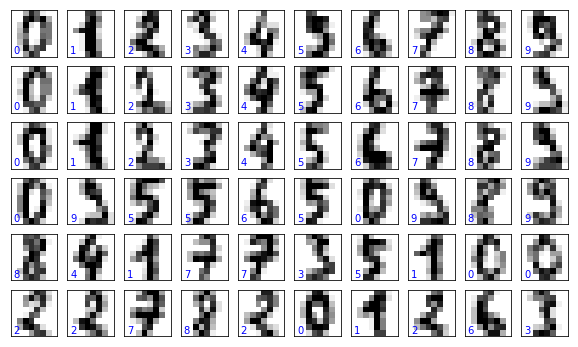

In [7]:
plt.figure(figsize = (10, 6))
for i_subplot in range(60):
    plt.subplot(6, 10, i_subplot + 1)
    draw_digit(X[i_subplot, :], y[i_subplot])

Разбиние на обучающую и тестовую выборки
--

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 7)
N_test, _ = X_test.shape

Обучение классификатора
--

In [9]:
from sklearn.neural_network import MLPClassifier

Нейронная сеть будет с двумя скрытыми слоями по 100 нейронов в  каждой

In [10]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,100), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

Классификация
--

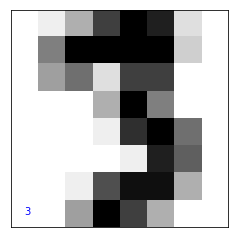

In [11]:
No = 42
Img = X_test[No, :]
dig = y_test[No]
draw_digit(Img, dig)

In [12]:
mlp_model.predict([Img])

array([3])

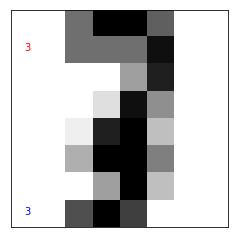

In [13]:
No = 92
Img = X_test[No, :]
dig = y_test[No]
dig_pred = mlp_model.predict([Img])[0]
draw_digit(Img, dig, dig_pred)

Проверка качества классификатора
--

In [14]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

In [15]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.0 0.0555555555556


In [16]:
print(mlp_model.score(X_train, y_train), mlp_model.score(X_test, y_test))

1.0 0.944444444444


In [17]:
print(1 - mlp_model.score(X_test, y_test))

0.0555555555556


Подбор *гипер*параметров
--

Подбор *оптимального* значения параметра регуляризации alpha для сети с двумя скрытыми слоями по 100 нейронов в каждом

In [20]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100, 100), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

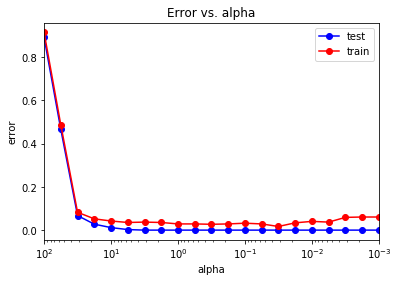

In [21]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'test')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

Заметного переобучения, т. е. резкого скачка ошибки на тестовых данных на данном диапазоне параметра alpha не наблюдается

Минимальное значение ошибки:

In [22]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.016835016835


По сравнению с alpha = 0.0001 (значение по умолчанию) удалось снизить ошибку на тестовых данных примерно в 3.5 раза

Оптимальное значение alpha:

In [23]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[ 0.03162278]


In [24]:
alpha_opt = alpha_opt[0]

Подбор *оптимального* количества нейронов в скрытых слоях (расматривается только случай с одинаковым размером слоёв) с aplha = alpha_opt

In [32]:
hidden_layers_sizes = range(10, 1001, 10)
test_err = []
train_err = []

for layer_size in hidden_layers_sizes:
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (layer_size, layer_size), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

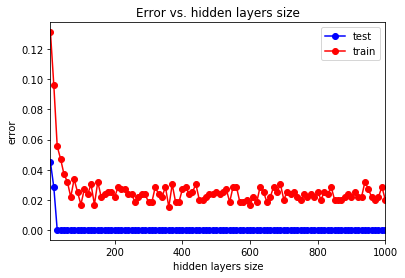

In [34]:
plt.plot(hidden_layers_sizes, train_err, 'b-o', label = 'test')
plt.plot(hidden_layers_sizes, test_err, 'r-o', label = 'train')
plt.xlim([np.min(hidden_layers_sizes), np.max(hidden_layers_sizes)])
plt.title('Error vs. hidden layers size')
plt.xlabel('hidden layers size')
plt.ylabel('error')
plt.legend()
pass

Здесь заметного переобучения так же не наблюдается, но ошибка довольно часто изменяется в зависимости от изменния количества нейронов

Минимальное значение ошибки:

In [35]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.0151515151515


Заметного улучшения качества на тестовых данных по сравнению со 100 нейронами в скрытых слоях достигнуть не удалось

Оптимальное количество нейронов в скрытых слоях:

In [37]:
for i in range(len(test_err)):
    if(test_err[i] == min_test_err):
        hidden_layers_size_opt = hidden_layers_sizes[i]
        break
print(hidden_layers_size_opt)

360


В итоге, после всех подборов параметров сети с двумя скрытыми слоями одинакового размера удалось улучшить качесвто предсказания тестовых данных в 3.6666666666732666. Самым значимым при этом оказался параметр регуляризации aplha

Классификатор при найденых *оптимальных* параметрах
--

Повтор обучения:

In [38]:
mlp_model = MLPClassifier(alpha = alpha_opt,
                          hidden_layer_sizes = (hidden_layers_size_opt, hidden_layers_size_opt),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.0
0.0151515151515


Матрица рассогласования
--

In [39]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[62  0  0  0  0  0  0  0  0  0]
 [ 0 56  0  0  0  0  0  0  2  0]
 [ 0  0 57  0  0  0  0  0  1  0]
 [ 0  0  0 57  0  0  0  0  0  1]
 [ 1  0  0  0 64  0  0  0  1  0]
 [ 0  0  0  0  0 51  0  0  1  0]
 [ 0  0  0  0  0  0 56  0  0  0]
 [ 0  0  0  0  0  0  0 58  1  0]
 [ 0  0  0  0  0  0  0  0 63  0]
 [ 0  1  0  0  0  0  0  0  0 61]]


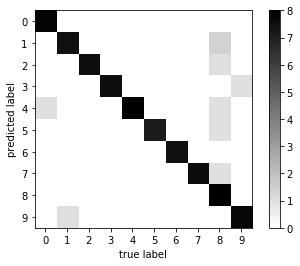

In [40]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

Другие метрики качества
--

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

          0       1.00      0.98      0.99        63
          1       0.97      0.98      0.97        57
          2       0.98      1.00      0.99        57
          3       0.98      1.00      0.99        57
          4       0.97      1.00      0.98        64
          5       0.98      1.00      0.99        51
          6       1.00      1.00      1.00        56
          7       0.98      1.00      0.99        58
          8       1.00      0.91      0.95        69
          9       0.98      0.98      0.98        62

avg / total       0.99      0.98      0.98       594



${\rm error} = \frac{{\rm FP} + {\rm FN}}{{\rm TP} + {\rm TN} + {\rm FP} + {\rm FN}}$
${\rm accuracy} = \frac{{\rm TP} + {\rm TN}}{{\rm TP} + {\rm TN} + {\rm FP} + {\rm FN}} = 1 - {\rm error}$
${\rm precision} = \frac{{\rm TP}}{{\rm FP}+{\rm TP}}$
$F_1 = 2\cdot\frac{{\rm precision}\cdot{\rm recall}}{{\rm precision}+{\rm recall}}$

Все ошибки
--

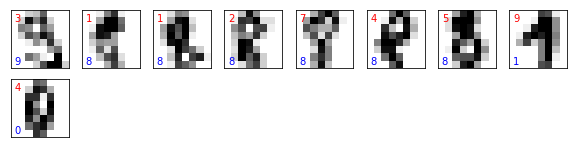

In [42]:
plt.figure(figsize = (10, 10))
i_subplot = 1 
for i in range(N_test):
    Img = X_test[i, :]
    dig = y_test[i]
    dig_pred = mlp_model.predict([Img])[0]
    if dig_pred != dig:
        plt.subplot(8, 8, i_subplot)
        draw_digit(Img, dig, dig_pred)
        i_subplot += 1